<a href="https://colab.research.google.com/github/fereol023/ML-on-ad-data/blob/Supervised/DecisionTree_LR_SVM_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lecture des données depuis Github**

In [1]:
import requests
import io 
import pandas as pd 
line = "========"*5
sep="\n"

url = "https://raw.githubusercontent.com/fereol023/ML-algorithms-on-ad-data/Supervised/ad_data.csv"

def load_data(url) :

  download = requests.get(url).content
  data = pd.read_csv(io.StringIO(download.decode()), sep = ",")
  print(data.shape)
  print(sep)
  print(line)
  print(data.dtypes)
  print(sep)
  print(line)
  for col in data : 
    if data[col].isnull().sum()!=0:
      print(data.isnull().sum())
  return data

print(sep)
print(line)
ad = load_data(url)
ad.head()



(3279, 1559)


height                  int64
width                   int64
aratio                float64
local                   int64
url.images.buttons      int64
                       ...   
caption.here            int64
caption.click           int64
caption.for             int64
caption.you             int64
class                  object
Length: 1559, dtype: object




,height,width,aratio,local,url.images.buttons,url.likesbooks.com,url.www.slake.com,url.hydrogeologist,url.oso,url.media,...,caption.home,caption.my,caption.your,caption.in,caption.bytes,caption.here,caption.click,caption.for,caption.you,class
0,125,125,1.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad
3,60,468,7.8000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad
4,60,468,7.8000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad


La variable d'interet est la dernière variable qui code le type de l'image avec deux valeurs "ad" et "noad".

In [2]:
ad.describe()

,height,width,aratio,local,url.images.buttons,url.likesbooks.com,url.www.slake.com,url.hydrogeologist,url.oso,url.media,...,caption.of,caption.home,caption.my,caption.your,caption.in,caption.bytes,caption.here,caption.click,caption.for,caption.you
count,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,...,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000
mean,46.390973,112.659347,2.826293,0.763647,0.004270,0.011589,0.004575,0.003355,0.003965,0.011589,...,0.006099,0.004575,0.003660,0.002440,0.003050,0.006404,0.012809,0.013419,0.009759,0.001525
std,54.766777,130.657205,5.426730,0.424906,0.065212,0.107042,0.067491,0.057831,0.062850,0.107042,...,0.077872,0.067491,0.060393,0.049341,0.055148,0.079783,0.112466,0.115077,0.098320,0.039026
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,88.000000,1.190400,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,144.000000,3.900000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,640.000000,640.000000,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Les variables d'indice 3 à k-1, sont binaires. Elles codent la présence ou non de la caractériques présente dans le nom de la variable. 

Les variables "height" "width" et "aratio" semblent porter des valeurs extrêmes car le maximum est trop éloigné du 3ème quartile.==> à standardiser. 

In [3]:
ad.iloc[:,-1].value_counts()

noad    2820
ad       459
Name: class, dtype: int64

Il y a globalement moins d'images publicitaires.

**PREPROCESSING**

In [4]:
from sklearn.preprocessing import StandardScaler

dat = ad.copy()
for col in ["height", "width", "aratio"] :
  dat[[col]] = StandardScaler().fit_transform(dat[[col]])

dat.describe()

,height,width,aratio,local,url.images.buttons,url.likesbooks.com,url.www.slake.com,url.hydrogeologist,url.oso,url.media,...,caption.of,caption.home,caption.my,caption.your,caption.in,caption.bytes,caption.here,caption.click,caption.for,caption.you
count,3.279000e+03,3.279000e+03,3.279000e+03,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,...,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000
mean,-3.467119e-17,-3.467119e-17,4.767289e-17,0.763647,0.004270,0.011589,0.004575,0.003355,0.003965,0.011589,...,0.006099,0.004575,0.003660,0.002440,0.003050,0.006404,0.012809,0.013419,0.009759,0.001525
std,1.000153e+00,1.000153e+00,1.000153e+00,0.424906,0.065212,0.107042,0.067491,0.057831,0.062850,0.107042,...,0.077872,0.067491,0.060393,0.049341,0.055148,0.079783,0.112466,0.115077,0.098320,0.039026
min,-8.471933e-01,-8.623828e-01,-5.208891e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.471933e-01,-8.623828e-01,-5.208891e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.810704e-01,-1.887619e-01,-3.014970e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.667905e-01,2.399059e-01,1.978854e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.084051e+01,4.036678e+00,1.053718e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**ESTIMATION et MATRICE DE CONFUSION**

ARBRE DE DECISION

In [9]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

y = dat.iloc[:,-1]
X = dat.iloc[:,:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=23)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(y_test.value_counts())
tree_classifier = DecisionTreeClassifier(random_state=23)
tree_classifier.fit(X_train, y_train)
y_pred = tree_classifier.predict(X_test)

matrix_tree = confusion_matrix(y_test, y_pred)
print(sep)
print(matrix_tree)

# Autres métriques
acc_tree = metrics.accuracy_score(y_test, y_pred)
report_tree = metrics.classification_report(y_test, y_pred)
print(sep)
print(line)
print("Classification report : DECISION TREE")
print(line)
print(report_tree)

# cross validation
cv_tree_results = cross_val_score(tree_classifier, X_train, y_train, cv=10) 
cv_tree_results = pd.DataFrame(cv_tree_results)
print(sep)
print(line)
print(cv_tree_results)

del y_pred

(2623, 1558) (2623,) (656, 1558) (656,)
noad    573
ad       83
Name: class, dtype: int64


[[ 72  11]
 [  9 564]]


Classification report : DECISION TREE
              precision    recall  f1-score   support

          ad       0.89      0.87      0.88        83
        noad       0.98      0.98      0.98       573

    accuracy                           0.97       656
   macro avg       0.93      0.93      0.93       656
weighted avg       0.97      0.97      0.97       656



          0
0  0.969582
1  0.950570
2  0.973384
3  0.958015
4  0.965649
5  0.961832
6  0.958015
7  0.946565
8  0.984733
9  0.977099


REGRESSION LOGISTIQUE

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

matrix_tree = confusion_matrix(y_test, y_pred)
print(sep)
print(matrix_tree)

# Autres métriques
acc_lr = metrics.accuracy_score(y_test, y_pred)
print(acc_lr)
report_lr = metrics.classification_report(y_test, y_pred)
print(sep)
print(line)
print("Classification report : LOG REG")
print(line)
print(report_lr)

# cross validation
cv_lr_results = cross_val_score(lr, X_train, y_train, cv=10) 
cv_lr_results = pd.DataFrame(cv_lr_results)
print(sep)
print(line)
print(cv_lr_results)


del y_pred



[[ 63  20]
 [  2 571]]
0.9664634146341463


Classification report : LOG REG
              precision    recall  f1-score   support

          ad       0.97      0.76      0.85        83
        noad       0.97      1.00      0.98       573

    accuracy                           0.97       656
   macro avg       0.97      0.88      0.92       656
weighted avg       0.97      0.97      0.96       656



          0
0  0.977186
1  0.973384
2  0.980989
3  0.973282
4  0.977099
5  0.973282
6  0.961832
7  0.958015
8  0.980916
9  0.961832


SVM AVEC NOYAU LINEAIRE

In [11]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC(random_state=23)
lsvc.fit(X_train, y_train)
y_pred = lsvc.predict(X_test)

matrix_lsvc = confusion_matrix(y_test, y_pred)
print(sep)
print(matrix_lsvc)

# Autres métriques
acc_lsvc = metrics.accuracy_score(y_test, y_pred)
print(acc_lsvc)
report_lsvc = metrics.classification_report(y_test, y_pred)
print(sep)
print(line)
print("Classification report : LIN SVC")
print(line)
print(report_lsvc)

# cross validation
cv_lsvc_results = cross_val_score(lsvc, X_train, y_train, cv=10) 
cv_lsvc_results = pd.DataFrame(cv_lsvc_results)
print(sep)
print(line)
print(cv_lsvc_results)

del y_pred



[[ 66  17]
 [  6 567]]
0.9649390243902439


Classification report : LIN SVC
              precision    recall  f1-score   support

          ad       0.92      0.80      0.85        83
        noad       0.97      0.99      0.98       573

    accuracy                           0.96       656
   macro avg       0.94      0.89      0.92       656
weighted avg       0.96      0.96      0.96       656



          0
0  0.969582
1  0.950570
2  0.973384
3  0.958015
4  0.965649
5  0.961832
6  0.958015
7  0.946565
8  0.984733
9  0.977099


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


RANDOM FOREST

In [12]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=23)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

matrix_rfc = confusion_matrix(y_test, y_pred)
print(sep)
print(matrix_rfc)

# Autres métriques
acc_rfc = metrics.accuracy_score(y_test, y_pred)
report_rfc = metrics.classification_report(y_test, y_pred)
print(sep)
print(line)
print("Classification report : DECISION TREE")
print(line)
print(report_rfc)

# cross validation
cv_rfc_results = cross_val_score(rfc, X_train, y_train, cv=10) 
cv_rfc_results = pd.DataFrame(cv_rfc_results)
print(sep)
print(line)
print(cv_rfc_results)

del y_pred



[[ 72  11]
 [  5 568]]


Classification report : DECISION TREE
              precision    recall  f1-score   support

          ad       0.94      0.87      0.90        83
        noad       0.98      0.99      0.99       573

    accuracy                           0.98       656
   macro avg       0.96      0.93      0.94       656
weighted avg       0.98      0.98      0.98       656



          0
0  0.988593
1  0.973384
2  0.988593
3  0.980916
4  0.980916
5  0.984733
6  0.965649
7  0.969466
8  0.988550
9  0.984733


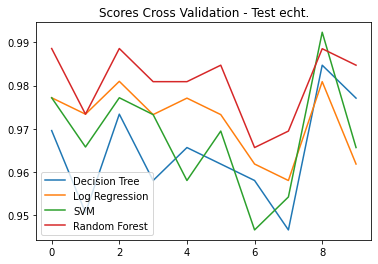

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(cv_tree_results, label="Decision Tree")
plt.plot(cv_lr_results, label="Log Regression")
plt.plot(cv_lsvc_results, label="SVM")
plt.plot(cv_rfc_results, label="Random Forest")
plt.legend()
plt.title("Scores Cross Validation - Test echt.")
plt.show()